### K-Means Clustering 

###**Problem Definition**

Perform K-Means Clustering on a dataset containing shopping details of customers from various cities to understand how clustering segregates the data similar to each other.




###**Dataset Description**

The dataset is based on the the shopping details of customers of few cities. The data has been populated randomly and holds no such relation to any real systems data or confidential data. It has 8 dimensions or features with 200 entries.

The Attributes are:

>* CustomerID
>* CustomerGender
>* CustomerAge
>* CustomerCity
>* AnnualIncome
>* CreditScore
>* SpendingScore
>* CustomerCityID

###**Tasks to be performed**


>* Importing Required Libraries
>* Analyzing the data
>* Understanding K-Means
>* Implementing K-Means from Scratch
>* Implementing K-Means using sklearn library 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

#### Reading dataset

In [2]:
data = pd.read_csv(r'Shopping_CustomerData.csv')
data

,CustomerID,CustomerGender,CustomerAge,CustomerCity,AnnualIncome,CreditScore,SpendingScore,CustomerCityID
0,1001,Male,49,Bengaluru,527547.58850,653,78,1
1,1002,Male,59,Bengaluru,207143.19760,630,63,1
2,1003,Female,54,Delhi,164423.84570,555,69,4
3,1004,Female,42,Bengaluru,56220.36443,699,30,1
4,1005,Female,30,Bengaluru,256194.36190,793,6,1
...,...,...,...,...,...,...,...,...
195,1196,Female,54,Delhi,317466.42070,601,52,4
196,1197,Female,20,Bengaluru,323305.50020,554,58,1
197,1198,Male,44,Chennai,109058.54430,844,36,2
198,1199,Male,28,Delhi,160116.89300,837,24,4


In [3]:
data.CustomerCity.unique()

array(['Bengaluru', 'Delhi', 'Chennai', 'Mumbai', 'Kolkata'], dtype=object)

#### Checking datatypes and missing values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      200 non-null    int64  
 1   CustomerGender  200 non-null    object 
 2   CustomerAge     200 non-null    int64  
 3   CustomerCity    200 non-null    object 
 4   AnnualIncome    200 non-null    float64
 5   CreditScore     200 non-null    int64  
 6   SpendingScore   200 non-null    int64  
 7   CustomerCityID  200 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 12.6+ KB


In [30]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,1100.500000,57.879185,1001.000000,1050.75000,1100.50000,1150.2500,1200.0000
CustomerAge,200.0,45.520000,16.113592,18.000000,31.75000,46.50000,59.0000,75.0000
AnnualIncome,200.0,285143.931646,169229.187619,2577.057456,153227.34095,263418.50555,384857.1162,695407.0917
CreditScore,200.0,719.975000,104.578236,551.000000,628.25000,715.00000,806.2500,897.0000
SpendingScore,200.0,50.705000,28.722690,2.000000,27.75000,48.00000,77.0000,100.0000
CustomerCityID,200.0,2.850000,1.475938,1.000000,1.75000,3.00000,4.0000,5.0000
Chennai,200.0,0.225000,0.418630,0.000000,0.00000,0.00000,0.0000,1.0000
Delhi,200.0,0.185000,0.389272,0.000000,0.00000,0.00000,0.0000,1.0000
Kolkata,200.0,0.145000,0.352984,0.000000,0.00000,0.00000,0.0000,1.0000
Mumbai,200.0,0.195000,0.397195,0.000000,0.00000,0.00000,0.0000,1.0000


#### Data pre-processing

In [8]:
data["CustomerGender"]=np.where(data['CustomerGender']=='male',1,0)

In [9]:
dummies = pd.get_dummies(data.CustomerCity,drop_first=True)

In [10]:
data = pd.concat([data, dummies],axis='columns')

In [31]:
data.head()

,CustomerID,CustomerAge,AnnualIncome,CreditScore,SpendingScore,CustomerCityID,Chennai,Delhi,Kolkata,Mumbai,groups
0,1001,49,527547.58850,653,78,1,0,0,0,0,4
1,1002,59,207143.19760,630,63,1,0,0,0,0,4
2,1003,54,164423.84570,555,69,4,0,1,0,0,0
3,1004,42,56220.36443,699,30,1,0,0,0,0,4
4,1005,30,256194.36190,793,6,1,0,0,0,0,4


#### Dropping varables

In [12]:
data = data.drop(['CustomerCity','CustomerGender'] , axis=1)

In [13]:
data.head()

,CustomerID,CustomerAge,AnnualIncome,CreditScore,SpendingScore,CustomerCityID,Chennai,Delhi,Kolkata,Mumbai
0,1001,49,527547.58850,653,78,1,0,0,0,0
1,1002,59,207143.19760,630,63,1,0,0,0,0
2,1003,54,164423.84570,555,69,4,0,1,0,0
3,1004,42,56220.36443,699,30,1,0,0,0,0
4,1005,30,256194.36190,793,6,1,0,0,0,0


#### scalling 

In [14]:
data_scaled = data.apply(lambda x: (x-np.mean(x)) / np.std(x))
data_scaled

,CustomerID,CustomerAge,AnnualIncome,CreditScore,SpendingScore,CustomerCityID,Chennai,Delhi,Kolkata,Mumbai
0,-1.723412,0.216509,1.435993,-0.642037,0.952679,-1.256586,-0.538816,-0.476439,-0.411814,-0.492175
1,-1.706091,0.838660,-0.462074,-0.862520,0.429133,-1.256586,-0.538816,-0.476439,-0.411814,-0.492175
2,-1.688771,0.527584,-0.715143,-1.581486,0.638551,0.781121,-0.538816,2.098906,-0.411814,-0.492175
3,-1.671450,-0.218997,-1.356137,-0.201071,-0.722668,-1.256586,-0.538816,-0.476439,-0.411814,-0.492175
4,-1.654129,-0.965579,-0.171497,0.700033,-1.560341,-1.256586,-0.538816,-0.476439,-0.411814,-0.492175
...,...,...,...,...,...,...,...,...,...,...
195,1.654129,0.527584,0.191478,-1.140520,0.045199,0.781121,-0.538816,2.098906,-0.411814,-0.492175
196,1.671450,-1.587730,0.226068,-1.591072,0.254618,-1.256586,-0.538816,-0.476439,-0.411814,-0.492175
197,1.688771,-0.094567,-1.043125,1.188930,-0.513249,-0.577350,1.855921,-0.476439,-0.411814,-0.492175
198,1.706091,-1.090009,-0.740657,1.121827,-0.932086,0.781121,-0.538816,2.098906,-0.411814,-0.492175


In [15]:
data_scaled.var()

CustomerID        1.005025
CustomerAge       1.005025
AnnualIncome      1.005025
CreditScore       1.005025
SpendingScore     1.005025
CustomerCityID    1.005025
Chennai           1.005025
Delhi             1.005025
Kolkata           1.005025
Mumbai            1.005025
dtype: float64

####  K_means_clustering using sklearn

In [17]:
km = KMeans(n_clusters=5,  n_init=40)
km.fit(data_scaled)

KMeans(n_clusters=5, n_init=40)

In [18]:
km.labels_

array([4, 4, 0, 4, 4, 1, 1, 3, 1, 2, 4, 4, 0, 3, 4, 2, 4, 3, 3, 2, 1, 4,
       2, 3, 4, 1, 2, 4, 0, 1, 4, 4, 1, 2, 1, 0, 3, 3, 3, 3, 3, 4, 4, 2,
       0, 2, 4, 3, 1, 1, 2, 4, 2, 3, 2, 0, 4, 4, 3, 4, 3, 0, 4, 4, 4, 1,
       3, 0, 1, 3, 4, 4, 2, 3, 0, 1, 0, 4, 1, 1, 0, 3, 2, 1, 0, 3, 4, 1,
       0, 0, 0, 2, 2, 3, 4, 3, 0, 3, 1, 1, 4, 1, 0, 4, 1, 1, 2, 0, 1, 3,
       1, 3, 1, 0, 1, 0, 3, 0, 2, 0, 1, 3, 0, 1, 3, 2, 1, 4, 4, 4, 2, 3,
       0, 2, 3, 0, 2, 4, 3, 1, 4, 4, 1, 2, 3, 3, 0, 0, 4, 2, 0, 0, 2, 1,
       4, 3, 2, 4, 4, 3, 4, 0, 0, 0, 1, 1, 4, 1, 3, 1, 4, 3, 4, 4, 3, 3,
       2, 1, 1, 0, 4, 4, 2, 1, 1, 2, 2, 1, 1, 0, 0, 3, 4, 4, 1, 0, 4, 1,
       0, 1])

In [19]:
data['groups'] = km.labels_

In [20]:
data.groupby('groups').mean()

,CustomerID,CustomerAge,AnnualIncome,CreditScore,SpendingScore,CustomerCityID,Chennai,Delhi,Kolkata,Mumbai
groups,,,,,,,,,,
0,1111.108108,42.945946,261862.793494,719.945946,47.135135,4.0,0.0,1.0,0.0,0.0
1,1109.822222,47.955556,308646.184984,724.355556,46.022222,2.0,1.0,0.0,0.0,0.0
2,1096.931034,47.862069,278743.162875,746.620690,60.413793,3.0,0.0,0.0,1.0,0.0
3,1093.589744,42.358974,295000.380115,715.769231,54.230769,5.0,0.0,0.0,0.0,1.0
4,1091.720000,46.340000,277244.361958,703.880000,49.180000,1.0,0.0,0.0,0.0,0.0


In [29]:
#Sum of squared distances of data-points to their closest cluster center. It tells us how well the formed clusters are
km.inertia_

695.6741680580676

In [28]:
#printing the centroids of each cluster
centroids = km.cluster_centers_
centroids

array([[ 3.10810780e-01,  3.89328539e-01,  1.23919132e+00,
        -7.67722650e-01, -7.92473685e-01,  1.46035656e+00,
        -5.38815906e-01, -4.76438732e-01, -4.11813845e-01,
         2.03179850e+00],
       [ 9.94609300e-01, -7.45433128e-01, -1.22627772e-01,
        -8.62519661e-01, -5.95096954e-02, -1.25658588e+00,
        -5.38815906e-01, -4.76438732e-01, -4.11813845e-01,
        -4.92174791e-01],
       [-1.15484048e+00, -1.29732098e-01, -2.70168449e-01,
        -2.76510193e-01, -1.93051789e-01, -1.25658588e+00,
        -5.38815906e-01, -4.76438732e-01, -4.11813845e-01,
        -4.92174791e-01],
       [ 4.30543725e-01,  1.08752070e+00,  3.90585202e-01,
         7.04141701e-01,  1.82318560e-01, -1.25658588e+00,
        -5.38815906e-01, -4.76438732e-01, -4.11813845e-01,
        -4.92174791e-01],
       [ 3.14507894e-02, -3.10682777e-01,  1.86434251e-01,
         9.50788516e-01, -3.74656656e-02,  7.81120952e-01,
        -5.38815906e-01,  2.09890576e+00, -4.11813845e-01,
        -4.

**How to determine the value of K?**

>* If we know how many classes we want to classify, then we use that value as 'k'. For Example - All of us have heard of the Iris data or even worked with it earlier. It has three classes we could classify our flowers into. So, in that case the value of k could be taken as 3.
>* If we don't know how many classes we want, then we will have to decide what the best 'k' value is. A very popular to find the value of 'k' is **Elbow Method**

In [22]:
#calculating the within group sum of sqaure for different cluster solutions
inertias = []
for k in [2,3,4,5,6,7,8,9,10,11,12]:
    km = KMeans(n_clusters=k, n_init=40)
    inertia = km.fit(data_scaled).inertia_
    inertias.append(inertia)

In [23]:
#total within group sse
inertias

[1629.830661105601,
 1370.4878730285834,
 1131.928939441795,
 980.5911043327242,
 927.9867688781351,
 879.8213182367565,
 836.4423690328815,
 795.6753001227199,
 759.689247163043,
 727.0674924796824,
 695.6741680580676]

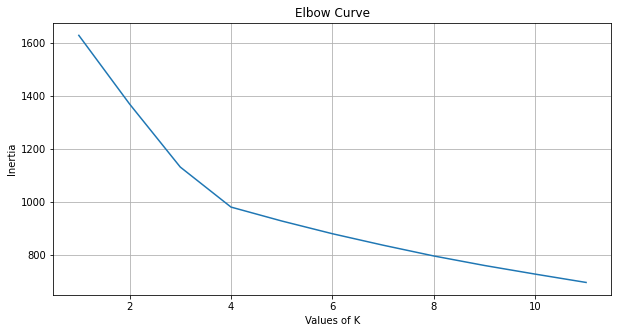

In [25]:
#Plotting the Elbow Curve
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, 12), inertias)
plt.grid(True)
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

**From above, we select the optimum value of k by determining the Elbow Point - a point after which the inertia starts decreasing linearly. In this case, we can select the value of k as 4.**